#**Métodos** **Ensemble**




###1️⃣ Introdução ao Problema

Objetivo: Prever a cor do vinho (tinto ou branco) com base em suas características químicas.

- Modelos utilizados:
  - Random Forest (RF) → Conjunto de árvores de decisão independentes.

  - Gradient Boosting (GB) → Modelos sequenciais corrigindo erros anteriores.
- Motivação: Comparar os dois modelos e entender suas diferenças.

## 📌 O que são Métodos Ensemble?
Métodos ensemble são técnicas que combinam múltiplos modelos de aprendizado de máquina para obter previsões mais precisas e robustas.
A ideia principal é que vários modelos juntos capturam padrões melhor do que um único modelo isolado.

### 🔹 Tipos de Métodos Ensemble:
1️⃣ **Bagging (Bootstrap Aggregating)** → Treina vários modelos independentes e combina suas previsões. Exemplo: **Random Forest**.

2️⃣ **Boosting** → Treina modelos sequencialmente, onde cada novo modelo corrige os erros do anterior. Exemplo: **Gradient Boosting**.

3️⃣ **Stacking (Stacked Generalization)** → Combina múltiplos modelos diferentes e usa um modelo final para tomar a decisão.

### 🔹 Benefícios dos Métodos Ensemble:
✔ **Maior precisão**: Reduz o erro do modelo.

✔ **Menos overfitting**: Modelos como Random Forest ajudam a evitar overffiting.

✔ **Melhor desempenho**: Modelos combinados aproveitam diferentes padrões nos dados.


Nesta análise, comparo dois dos principais métodos ensemble: **Random Forest (Bagging)** e **Gradient Boosting (Boosting)**, aplicados na previsão da cor do vinho.


##Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Carregar e explorar o dataset


In [2]:
url = '/content/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
print("\n📌 Informações gerais sobre o dataset:")
print(arquivo.info())

print("\n📌 Estatísticas descritivas das variáveis numéricas:")
print(arquivo.describe())

print("\n📌 Contagem de cada classe da variável alvo 'color':")
print(arquivo['color'].value_counts())



📌 Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

📌 Estatísticas des

## Pré-processamento dos dados



In [4]:
# Converter a variável alvo (cor) para valores numéricos
arquivo['color'] = arquivo['color'].map({'red': 0, 'white': 1})
# Verificar se há colunas não numéricas
arquivo = arquivo.select_dtypes(include=['number'])

## Visualização dos dados


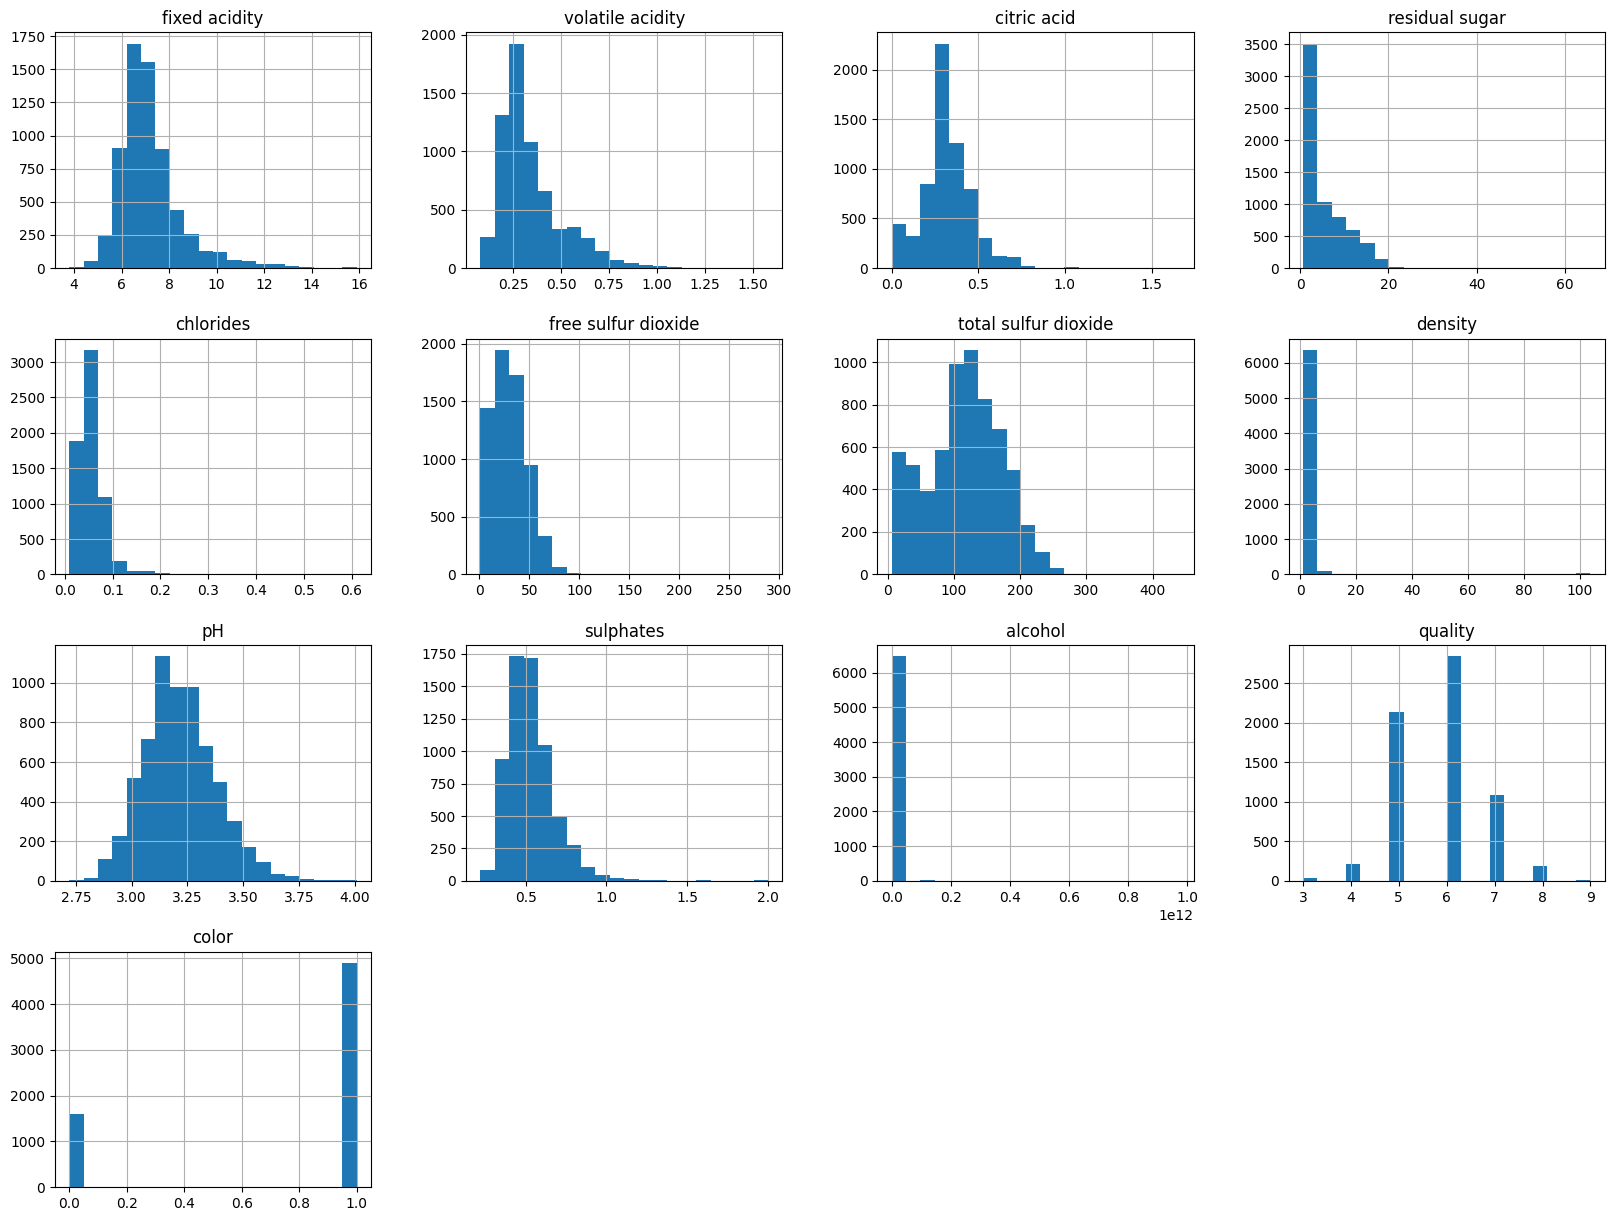

In [5]:
# Histogramas para entender a distribuição das variáveis
arquivo.hist(figsize=(20, 15), bins=20)
plt.show()

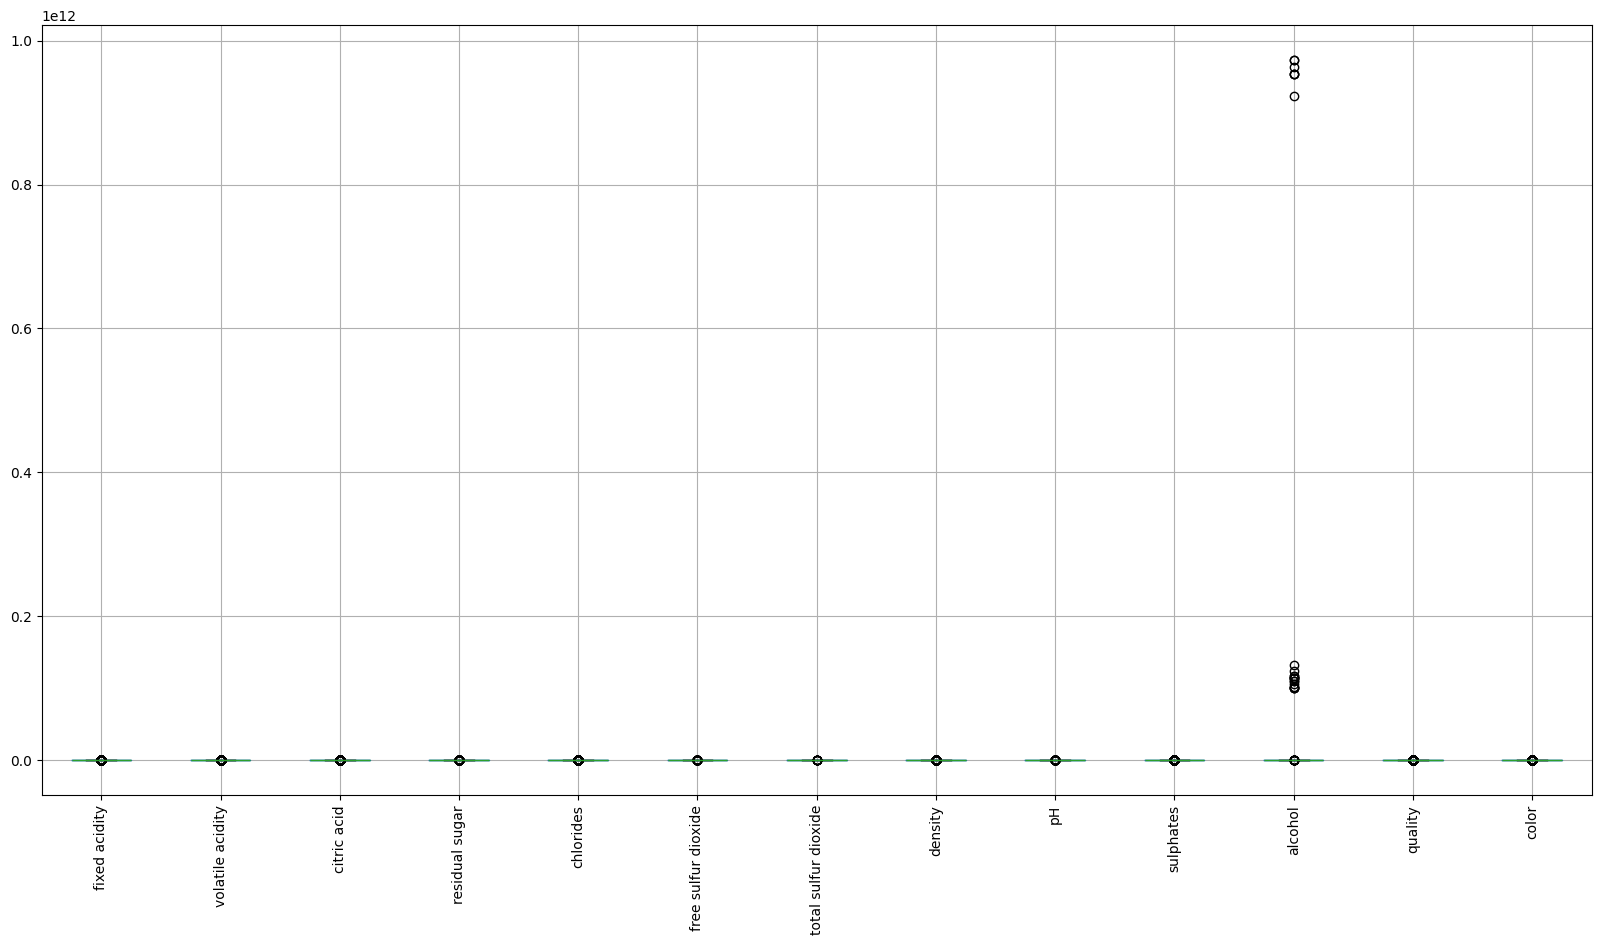

In [6]:
# Boxplots para identificar outliers
arquivo.boxplot(figsize=(20, 10), rot=90)
plt.show()

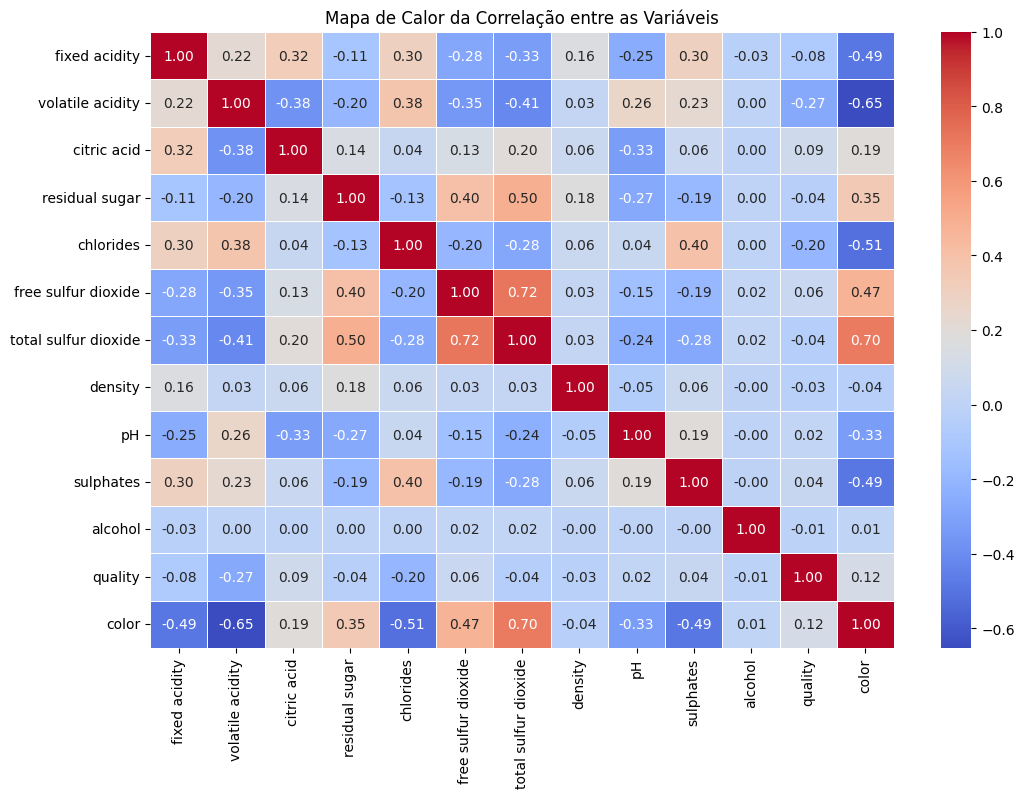

In [7]:
# Mapa de calor para analisar a correlação entre variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(arquivo.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor da Correlação entre as Variáveis")
plt.show()

## Preparação para Treinamento


In [8]:
# Definir variáveis independentes (X) e dependente (y)
y = arquivo['color']
X = arquivo.drop(['color', 'quality'], axis=1)

In [9]:
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Treinamento e Avaliação dos Modelos Ensemble

In [10]:
rf_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    random_state=42)

###2️⃣ Explicação dos Modelos

####📍 Random Forest
- Constrói várias árvores de decisão independentes.
- Cada árvore recebe um subconjunto aleatório dos dados.
- O resultado final é a média das previsões de todas as árvores (voto majoritário para classificação).

✔ Vantagens:

✅ Rápido para treinar.

✅ Menos propenso a overfitting (por causa do bagging).

✅ Bom para datasets médios/grandes.

❌ Limitações:

🚫 Pode ser menos preciso do que métodos boosteados.

🚫 Ocupa mais memória, pois cria muitas árvores.



In [11]:
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.01,
    max_depth=2,
    subsample=0.6,
    random_state=42
)

####📍 Gradient Boosting

- Constrói árvores sequencialmente, onde cada nova árvore corrige os erros da anterior.
- Aprendizado mais lento, porém mais preciso.
- Usa um fator de aprendizado (learning_rate) para ajustar o peso das novas árvores.

✔ Vantagens:

✅ Melhor desempenho em datasets menores.

✅ Identifica padrões mais complexos.

❌ Limitações:

🚫 Mais propenso a overfitting.

🚫 Requer ajuste fino de hiperparâmetros.

🚫 Treinamento mais demorado.



In [12]:
# Treinando os modelos
rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=150,
                           random_state=42, subsample=0.6)


## Comparação dos Modelos


📍 Análise de Performance

- Acurácia de Treinamento vs. Teste → Para verificar overfitting.
- Matriz de Confusão → Para entender erros e acertos.
- Análise das Previsões → Comparação de erros exclusivos.

In [13]:
models = {"Random Forest": rf_model, "Gradient Boosting": gb_model}

In [14]:
for name, model in models.items():
    print(f"\n🔍 Avaliação do modelo: {name}")

    # Acurácia no conjunto de treinamento
    train_accuracy = model.score(x_train, y_train)
    print(f'Acurácia no Treino: {train_accuracy:.4f}')

    # Acurácia no conjunto de teste
    y_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia no Teste: {test_accuracy:.4f}')

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')


🔍 Avaliação do modelo: Random Forest
Acurácia no Treino: 0.9894
Acurácia no Teste: 0.9915
Precisão: 0.9949
Recall: 0.9939
F1-score: 0.9944

🔍 Avaliação do modelo: Gradient Boosting
Acurácia no Treino: 0.9769
Acurácia no Teste: 0.9738
Precisão: 0.9768
Recall: 0.9888
F1-score: 0.9828


In [15]:
# Validação Cruzada para melhor avaliação dos modelos
cv_folds = 5

rf_scores = cross_val_score(rf_model, X, y, cv=cv_folds, scoring='accuracy')
gb_scores = cross_val_score(gb_model, X, y, cv=cv_folds, scoring='accuracy')

print(f"📊 Validação Cruzada - Random Forest (média de {cv_folds} folds): {rf_scores.mean():.4f}")
print(f"📊 Validação Cruzada - Gradient Boosting (média de {cv_folds} folds): {gb_scores.mean():.4f}")

📊 Validação Cruzada - Random Forest (média de 5 folds): 0.9863
📊 Validação Cruzada - Gradient Boosting (média de 5 folds): 0.9723


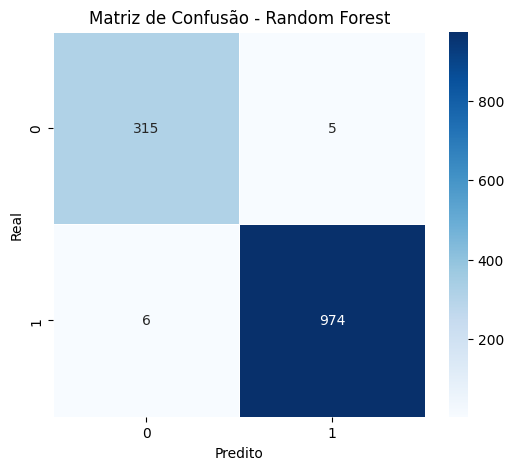

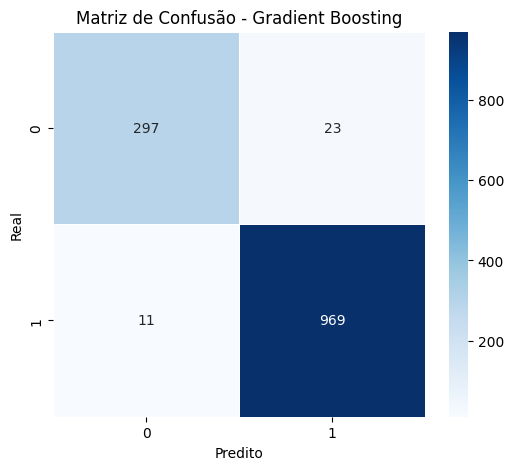

In [16]:
for name, model in models.items():
    # Fazer previsões para o modelo atual
    y_pred = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()


In [17]:

for name, model in models.items():
    # Fazer previsões no conjunto de teste
    y_pred = model.predict(x_test)

    # Calcular a matriz de confusão específica para o modelo atual
    cm = confusion_matrix(y_test, y_pred)

    # Normalizar a matriz de confusão
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Exibir os valores normalizados
    print(f"\n📊 Matriz de Confusão Normalizada - {name}")
    print("True Positive (rate): ", cm[1, 1], "({0:0.4f})".format(cm_norm[1, 1]))
    print("True Negative (rate): ", cm[0, 0], "({0:0.4f})".format(cm_norm[0, 0]))
    print("False Positive (rate):", cm[1, 0], "({0:0.4f})".format(cm_norm[1, 0]))
    print("False Negative (rate):", cm[0, 1], "({0:0.4f})".format(cm_norm[0, 1]))


📊 Matriz de Confusão Normalizada - Random Forest
True Positive (rate):  974 (0.9939)
True Negative (rate):  315 (0.9844)
False Positive (rate): 6 (0.0061)
False Negative (rate): 5 (0.0156)

📊 Matriz de Confusão Normalizada - Gradient Boosting
True Positive (rate):  969 (0.9888)
True Negative (rate):  297 (0.9281)
False Positive (rate): 11 (0.0112)
False Negative (rate): 23 (0.0719)


In [18]:
# Fazer previsões
y_pred_rf = rf_model.predict(x_test)
y_pred_gb = gb_model.predict(x_test)

# Comparar previsões entre os modelos
iguais = sum(y_pred_rf == y_pred_gb)
total = len(y_pred_rf)

print(f"Número de previsões idênticas entre os modelos: {iguais}/{total} ({(iguais/total)*100:.2f}%)")


Número de previsões idênticas entre os modelos: 1277/1300 (98.23%)


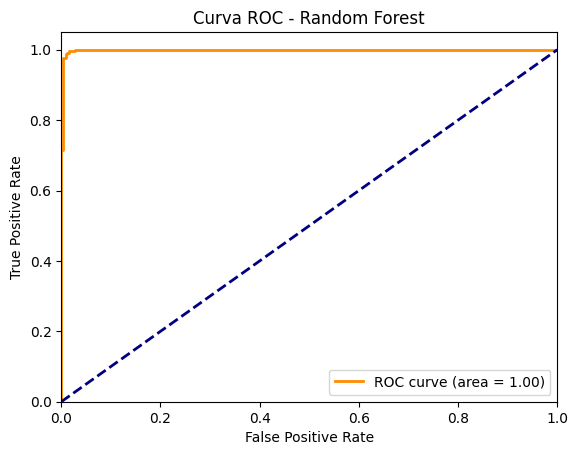

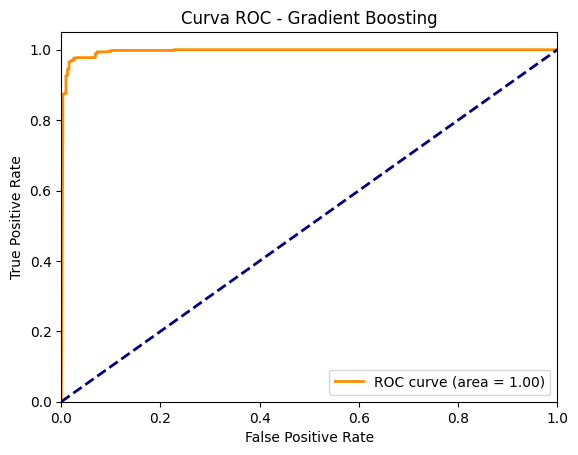

In [19]:
for name, model in models.items():
   # Curva ROC
    y_probs = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {name}')
    plt.legend(loc="lower right")
    plt.show()


## Um pouco mais detalhado...


In [20]:
y_pred_rf = rf_model.predict(x_test)
y_pred_gb = gb_model.predict(x_test)

# Comparação dos vetores de previsão
print("Os modelos fizeram as mesmas previsões?", np.array_equal(y_pred_rf, y_pred_gb))

Os modelos fizeram as mesmas previsões? False


In [21]:
# Comparação entre as previsões dos dois modelos
diffs = np.sum(y_pred_rf != y_pred_gb)
print(f"Número de previsões diferentes entre os modelos: {diffs}")

Número de previsões diferentes entre os modelos: 23


In [22]:
# Índices das previsões erradas por cada modelo
erros_rf = np.where(y_pred_rf != y_test)[0]
erros_gb = np.where(y_pred_gb != y_test)[0]

# Comparar erros únicos entre os modelos
erros_unicos_rf = set(erros_rf) - set(erros_gb)
erros_unicos_gb = set(erros_gb) - set(erros_rf)

print(f"Número de erros exclusivos do Random Forest: {len(erros_unicos_rf)}")
print(f"Número de erros exclusivos do Gradient Boosting: {len(erros_unicos_gb)}")

Número de erros exclusivos do Random Forest: 0
Número de erros exclusivos do Gradient Boosting: 23



## Importância das Features


4️⃣ Importância das Features
- Analise de quais variáveis tiveram maior impacto nas previsões.
- Random Forest e Gradient Boosting podem atribuir pesos diferentes às features.
- Isso pode indicar quais atributos químicos do vinho são mais relevantes para definir sua cor.

In [23]:
importances_rf = rf_model.feature_importances_
importances_gb = gb_model.feature_importances_

print("\n📌 Importância das Features - Random Forest:")
for feature, importance in zip(X.columns, importances_rf):
    print(f"{feature}: {importance:.4f}")

print("\n📌 Importância das Features - Gradient Boosting:")
for feature, importance in zip(X.columns, importances_gb):
    print(f"{feature}: {importance:.4f}")



📌 Importância das Features - Random Forest:
fixed acidity: 0.0240
volatile acidity: 0.0569
citric acid: 0.0233
residual sugar: 0.0273
chlorides: 0.2701
free sulfur dioxide: 0.0506
total sulfur dioxide: 0.4196
density: 0.0499
pH: 0.0069
sulphates: 0.0660
alcohol: 0.0056

📌 Importância das Features - Gradient Boosting:
fixed acidity: 0.0000
volatile acidity: 0.0307
citric acid: 0.0007
residual sugar: 0.0002
chlorides: 0.4258
free sulfur dioxide: 0.0000
total sulfur dioxide: 0.5317
density: 0.0089
pH: 0.0001
sulphates: 0.0018
alcohol: 0.0000


## 🍷 Aplicações Práticas dos Métodos Ensemble


Os métodos ensemble são amplamente utilizados em diversos setores para resolver problemas complexos de classificação e regressão. Algumas aplicações incluem:

✔ **Medicina e Diagnóstico Médico** 🏥
   - Detecção de doenças a partir de exames de imagem (câncer, pneumonia, retinopatia diabética).
   - Análise de exames laboratoriais para prever condições médicas.

✔ **Finanças e Detecção de Fraudes 💳**
   - Detecção de transações fraudulentas com Random Forest e Gradient Boosting.
   - Previsão de inadimplência e análise de crédito.

✔ **Reconhecimento de Padrões e Processamento de Imagem 📷**
   - Reconhecimento facial e biometria.
   - Detecção de objetos e segmentação de imagens.

✔ **Previsão de Demanda e Otimização Logística 🚛**
   - Previsão de vendas com base em séries temporais.
   - Otimização de rotas e estoques utilizando modelos de aprendizado ensemble.

✔ **Classificação de Texto e Análise de Sentimentos 📄**
   - Detecção de spam em e-mails e mensagens.
   - Análise de sentimentos em redes sociais e avaliações de produtos.

✔ **Sistemas de Recomendação 🎵🎥**
   - Recomendação de músicas, filmes e produtos personalizados.
   - Modelos ensemble combinam diferentes algoritmos para melhorar sugestões.

Os métodos ensemble são extremamente versáteis e são aplicados sempre que há necessidade de alta precisão e robustez no aprendizado de máquina.

##📌 Conclusão



✅ O Random Forest tive um desempenho melhor em termos de acertos e erros.

✅ O Gradient Boosting errou em mais pontos exclusivos, enquanto o Random Forest foi mais estável.

✅ Ambos os modelos podem ser usados para prever a cor do vinho com alta confiabilidade.